# Using Arbitay Imputation
Using this technique when Data is not randomly missing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
df = sns.load_dataset('titanic')[['age', 'deck', 'survived']]
df.head()

,age,deck,survived
0,22.0,NaN,0
1,38.0,C,1
2,26.0,NaN,1
3,35.0,C,1
4,35.0,NaN,0


In [7]:
df.isnull().mean() * 100

age         19.865320
deck        77.216611
survived     0.000000
dtype: float64

In [12]:
X = df.drop('survived', axis=1)
y = df['survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train['Age_99'] = X_train['age'].fillna(99)
X_train['Age_-1'] = X_train['age'].fillna(-1)

In [18]:
X_train['deck_missing'] = X_train['deck'].cat.add_categories('missing').fillna('missing')

In [23]:
X_train

,age,deck,Age_99,deck_missing,Age_-1
331,45.5,C,45.5,C,45.5
733,23.0,NaN,23.0,missing,23.0
382,32.0,NaN,32.0,missing,32.0
704,26.0,NaN,26.0,missing,26.0
813,6.0,NaN,6.0,missing,6.0
...,...,...,...,...,...
106,21.0,NaN,21.0,missing,21.0
270,NaN,NaN,99.0,missing,-1.0
860,41.0,NaN,41.0,missing,41.0
435,14.0,B,14.0,B,14.0


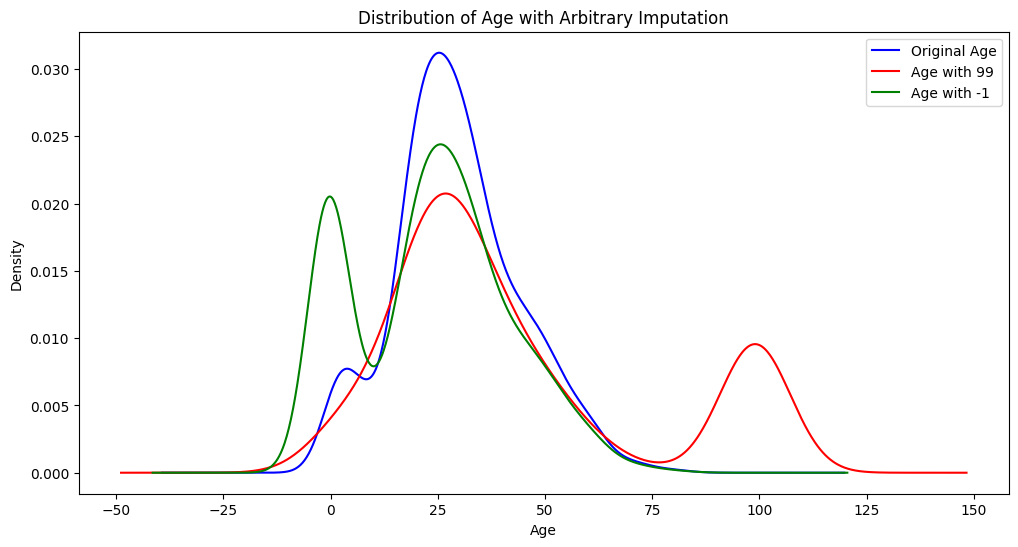

In [26]:
fig = plt.figure(figsize=(12, 6))
aX = fig.add_subplot(111)

# Original variable distribution
X_train['age'].plot(kind='kde', ax=aX, label='Original Age', color='blue')

# Variable with arbitrary imputation age=99
X_train['Age_99'].plot(kind='kde', ax=aX, label='Age with 99', color='red')
X_train['Age_-1'].plot(kind='kde', ax=aX, label='Age with -1', color='green')

plt.legend()
plt.title('Distribution of Age with Arbitrary Imputation')
plt.xlabel('Age')  
plt.ylabel('Density')
plt.show()

## Using Sklearn

In [33]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value='missing')


In [34]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['age']),
    ('imputer2', imputer2, ['deck'])
], remainder='passthrough')

In [36]:
trf.fit_transform(X_train)

array([[45.5, 'C', 45.5, 'C', 45.5],
       [23.0, 'missing', 23.0, 'missing', 23.0],
       [32.0, 'missing', 32.0, 'missing', 32.0],
       ...,
       [41.0, 'missing', 41.0, 'missing', 41.0],
       [14.0, 'B', 14.0, 'B', 14.0],
       [21.0, 'D', 21.0, 'D', 21.0]], dtype=object)

In [40]:
trf.named_transformers_['imputer1'].statistics_

array([99.])